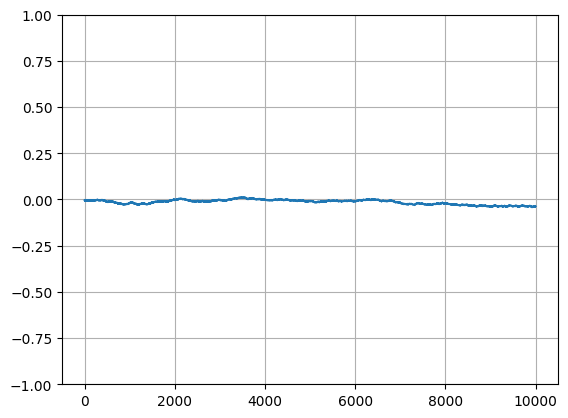

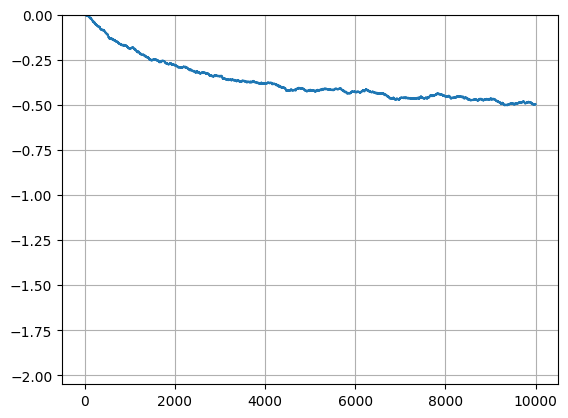

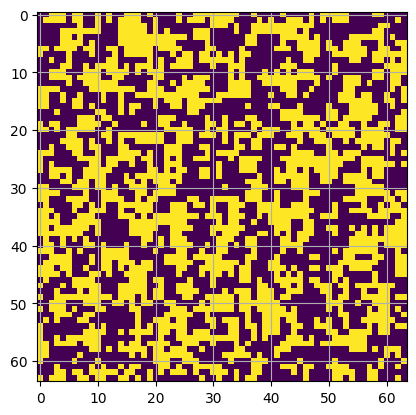

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt

l = 64
T = 4

# Tc=2.269185314

sm = np.zeros((l, l))

pt = 0.5 # se voglio gli spin equilibrati 50% up e 50% down

for i in range(l):
    for j in range(l):
        r1 = random.uniform(0, 1)
        if r1 < pt:
            sm[i, j] = -1
        else:
            sm[i, j] = 1

            
#quanti numeri di step vogliamo?

ns = 10000
# for fast calculation max 1000000
ls = np.arange(1, l+1, 1)
# vector=[1:stepsize:n]

m1 = np.zeros(ns)
e0 = 0
e = np.zeros(ns)

for it in range(ns):
    isx = random.choice(ls)
    isy = random.choice(ls)

    if isx == 1:
        issx = l
    else:
        issx = isx-1

    if isx == l:
        isdx = 1
    else:
        isdx = isx+1

    if isy == 1:
        isby = l
    else:
        isby = isy-1

    if isy == l:
        isty = 1
    else:
        isty = isy+1
    
    #calcoliamo l'energia della corrente configurazione
    hc = -(sm[isx-1, isy-1]*sm[isdx-1, isy-1] + sm[isx-1, isy-1]*sm[issx-1, isy-1] + sm[isx-1, isy-1]*sm[isx-1, isty-1] + sm[isx-1, isy-1]*sm[isx-1, isby-1])
    #e l'energia dopo aver flippato
    hf = - hc
    #inizializziamo il deltaE a 0
    de = 0
    
    
    
    #This block implements the Metropolis acceptance criteria. If the energy of the new state is lower than the current state, the spin is flipped without further checks (if hf < hc). Otherwise, there is a probability of flipping the spin, determined by the Boltzmann factor p1. If a random number ru1 is less than p1, the spin is flipped. The energy change de is updated accordingly.
    if hf < hc:
        sm[isx-1, isy-1] = - sm[isx-1, isy-1]
        de = hf-hc
    else:

        p1 = np.exp(-(hf-hc)/T)
        ru1 = random.uniform(0, 1)

        if ru1 < p1:
            sm[isx-1, isy-1] = -sm[isx-1, isy-1]
            de = hf-hc
    #These lines update the magnetization m1 and energy e at the current step. The magnetization is simply the sum of all the spins in the lattice. For the energy,
    m1[it] = np.sum(sm)
    if it == 0:
        e[it] = e0
    else:
        e[it] = e[it-1] + de

e = e/l**2
m1 = m1/l**2
tsteps = np.arange(1, ns+1, 1)

plt.figure(1)
plt.plot(tsteps, m1)
plt.ylim([-1, 1])
plt.grid()

plt.figure(2)
plt.plot(tsteps, e)
plt.ylim([-2.05, 0])
plt.grid()

plt.figure(3)
plt.imshow(sm)
plt.grid()
plt.show()